# Fantasy Football EDA (Exploratory Data Analysis)

EDA is a process of examining the available dataset to discover patterns, spot anomalies, test hypotheses, and check assumptions using statistical measures.

Author: Ermina Mujan

Date: May 11, 2021

This dataset is from kaggle user mur418. It contains data on NFL players for 2019 actuals and 2020 projections

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})

### Gather Data

In [3]:
qbs = pd.read_csv('../../fixtures/raw_data/qb_stats_and_projections_kaggle.csv')
wrs = pd.read_csv('../../fixtures/raw_data/wr_stats_and_projections_kaggle.csv')
rbs = pd.read_csv('../../fixtures/raw_data/rb_stats_and_projections_kaggle.csv')
te = pd.read_csv('../../fixtures/raw_data/te_stats_and_projections_kaggle.csv')
dst = pd.read_csv('../../fixtures/raw_data/defense_stats_and_projections_kaggle.csv')
kickers = pd.read_csv('../../fixtures/raw_data/kicker_stats_and_projections_kaggle.csv')

### Begin cleaning the dataset by improving readability of column names and dropping unnecessary columns and rows

In [4]:
dst.head()

,Unnamed: 0,TEAM NAME,2019 SCK,2019 INT,2019 FR,2019 TD,2019 PA,2019 YA,2019 FPTS,2020 SCK,2020 INT,2020 FR,2020 TD,2020 PA,2020 YA,2020 FPTS,2020 OUTLOOK
0,1,Steelers D/ST,54,20,18,4,285,4866,181.0,44,13,12,3,303,5443,137.08,"Following a rough start to the 2019 season, Pi..."
1,2,Bills D/ST,44,14,9,1,251,4772,131.0,41,13,11,3,306,5352,134.16,Yet another strong performance from Sean McDer...
2,3,49ers D/ST,48,12,15,5,296,4509,164.0,44,13,13,3,321,5489,124.74,After four consecutive seasons finishing 29th ...
3,4,Colts D/ST,41,15,8,3,355,5549,114.0,42,11,10,3,314,5446,122.57,The Colts' D/ST has finished 13th in fantasy p...
4,5,Patriots D/ST,47,25,11,7,195,4414,225.0,41,14,8,2,314,5438,122.18,The Patriots were the top-scoring fantasy D/ST...


In [5]:
#for now, lets rename defense team name to player name

temp_dst = dst.rename(columns={"Teamname": "Playername"})
temp_dst['Playerposition'] = 'DST'

In [6]:
full_df = pd.concat([qbs, wrs, rbs, te, temp_dst, kickers])

In [7]:
full_df.head()

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 COMPLETED PASS,2019 ATTEMPTED PASS,2019 PASSING YDS,2019 PASSING TD,2019 INT,2019 CAR,...,2020 COMPLETED 1-39,2020 ATTEMPTED 1-39,2020 COMPLETED 40-49,2020 ATTEMPTED 40-49,2020 COMPLETED 50+,2020 ATTEMPTED 50+,2020 COMPLETED TOT,2020 ATTEMPTED TOT,2020 COMPLETED XP,2020 ATTEMPTED XP
0,1,Lamar Jackson,Ravens,QB,265.0,401.0,3127.0,36.0,6.0,176.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Patrick Mahomes,Chiefs,QB,319.0,484.0,4031.0,26.0,5.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Deshaun Watson,Texans,QB,333.0,495.0,3852.0,26.0,12.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Dak Prescott,Cowboys,QB,388.0,596.0,4902.0,30.0,11.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Russell Wilson,Seahawks,QB,341.0,516.0,4110.0,31.0,5.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
full_df.tail()

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 COMPLETED PASS,2019 ATTEMPTED PASS,2019 PASSING YDS,2019 PASSING TD,2019 INT,2019 CAR,...,2020 COMPLETED 1-39,2020 ATTEMPTED 1-39,2020 COMPLETED 40-49,2020 ATTEMPTED 40-49,2020 COMPLETED 50+,2020 ATTEMPTED 50+,2020 COMPLETED TOT,2020 ATTEMPTED TOT,2020 COMPLETED XP,2020 ATTEMPTED XP
45,46,Mike Nugent,FA,K,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,47,Graham Gano,Panthers,K,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,48,Ryan Succop,Titans,K,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,49,Stephen Gostkowski,FA,K,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,50,Tyler Bass,Bills,K,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
shape_info = full_df.shape

In [10]:
index = full_df.index
number_of_rows = len(index)

print(number_of_rows)

1002


In [11]:
print('This dataset evaluates {} players based on data from {} columns' # print this phrase with variables added in
      .format(shape_info[0], # using the .format method, insert the number of rows in the dataframe
              shape_info[1])) # using the .format method, insert the number of columns in the dataframe

This dataset evaluates 1002 players based on data from 82 columns


In [12]:
list(full_df)

['Unnamed: 0',
 'PLAYER NAME',
 'TEAM NAME',
 'PLAYER POSITION',
 '2019 COMPLETED PASS',
 '2019 ATTEMPTED PASS',
 '2019 PASSING YDS',
 '2019 PASSING TD',
 '2019 INT',
 '2019 CAR',
 '2019 RUSH YDS',
 '2019 RUSH TD',
 '2019 FPTS',
 '2020 COMPLETED PASS',
 '2020 ATTEMPTED PASS',
 '2020 PASSING YDS',
 '2020 PASSING TD',
 '2020 INT',
 '2020 CAR',
 '2020 RUSH YDS',
 '2020 RUSH TD',
 '2020 FPTS',
 '2020 OUTLOOK',
 'TEAM',
 'POSITION',
 '2019 TAR',
 '2019 REC',
 '2019 REC YARDS',
 '2019 AVG REC YARDS',
 '2019 REC TDS',
 '2019 RUSH CAR',
 '2019 RUSH YARDS',
 '2019 RUSH TDS',
 '2020 TAR',
 '2020 REC',
 '2020 REC YARDS',
 '2020 AVG REC YARDS',
 '2020 REC TDS',
 '2020 RUSH CAR',
 '2020 RUSH YARDS',
 '2020 RUSH TDS',
 '2020 PLAYER OUTLOOK',
 '2019 RUSH AVG',
 '2019 REC YDS',
 '2020 RUSH AVG',
 '2020 REC YDS',
 '2020 REC TD',
 'Player OUTLOOK',
 '2019 AVG REC YDS',
 '2019 REC TD',
 '2020 AVG REC YDS',
 '2019 SCK',
 '2019 FR',
 '2019 TD',
 '2019 PA',
 '2019 YA',
 '2020 SCK',
 '2020 FR',
 '2020 TD',
 

In [13]:
# check if length of dataframe is 0 by calling len on Dataframe

if len(full_df) == 0:
    print('DataFrame is empty')
else:
    print('DataFrame is not empty')

DataFrame is not empty


In [14]:
# Dropping the columns we do not need

full_df = full_df.drop(['Unnamed: 0', '2020 OUTLOOK', 'Player OUTLOOK', '2020 PLAYER OUTLOOK',], axis=1) 

In [15]:
# shows how many many columns have been deleted

new_shape = full_df.shape[1]

print('{} columns have been removed from the dataset'
      .format( abs(new_shape-shape_info[1])))

4 columns have been removed from the dataset


In [16]:
# removing spaces from old column names

df_old_cols = list(full_df) # instantiate a new list with old column names in it

df_new_cols = [x.replace(" ", "").capitalize() for x in df_old_cols] # remove the spaces and make everything lowercase

In [17]:
df_new_cols[0] # make sure it worked by checking the first name

'Playername'

In [18]:
full_df.columns = df_new_cols # make df_new_cols the column names

full_df.head() # check to make sure that this change stuck

,Playername,Teamname,Playerposition,2019completedpass,2019attemptedpass,2019passingyds,2019passingtd,2019int,2019car,2019rushyds,...,2020completed1-39,2020attempted1-39,2020completed40-49,2020attempted40-49,2020completed50+,2020attempted50+,2020completedtot,2020attemptedtot,2020completedxp,2020attemptedxp
0,Lamar Jackson,Ravens,QB,265.0,401.0,3127.0,36.0,6.0,176.0,1206.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Patrick Mahomes,Chiefs,QB,319.0,484.0,4031.0,26.0,5.0,43.0,218.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deshaun Watson,Texans,QB,333.0,495.0,3852.0,26.0,12.0,82.0,413.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dak Prescott,Cowboys,QB,388.0,596.0,4902.0,30.0,11.0,52.0,277.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Russell Wilson,Seahawks,QB,341.0,516.0,4110.0,31.0,5.0,75.0,342.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
list(full_df)

['Playername',
 'Teamname',
 'Playerposition',
 '2019completedpass',
 '2019attemptedpass',
 '2019passingyds',
 '2019passingtd',
 '2019int',
 '2019car',
 '2019rushyds',
 '2019rushtd',
 '2019fpts',
 '2020completedpass',
 '2020attemptedpass',
 '2020passingyds',
 '2020passingtd',
 '2020int',
 '2020car',
 '2020rushyds',
 '2020rushtd',
 '2020fpts',
 'Team',
 'Position',
 '2019tar',
 '2019rec',
 '2019recyards',
 '2019avgrecyards',
 '2019rectds',
 '2019rushcar',
 '2019rushyards',
 '2019rushtds',
 '2020tar',
 '2020rec',
 '2020recyards',
 '2020avgrecyards',
 '2020rectds',
 '2020rushcar',
 '2020rushyards',
 '2020rushtds',
 '2019rushavg',
 '2019recyds',
 '2020rushavg',
 '2020recyds',
 '2020rectd',
 '2019avgrecyds',
 '2019rectd',
 '2020avgrecyds',
 '2019sck',
 '2019fr',
 '2019td',
 '2019pa',
 '2019ya',
 '2020sck',
 '2020fr',
 '2020td',
 '2020pa',
 '2020ya',
 'Playerposition',
 '2019completed1-39',
 '2019attempted1-39',
 '2019completed40-49',
 '2019attempted40-49',
 '2019completed50+',
 '2019attempt

In [20]:
#rename position to player position, and team to teamname like the rest of the tables

full_df = full_df.rename(columns={"Position": "Playerposition"})
full_df = full_df.rename(columns={"Team": "Teamname"})

In [21]:
list(full_df)

['Playername',
 'Teamname',
 'Playerposition',
 '2019completedpass',
 '2019attemptedpass',
 '2019passingyds',
 '2019passingtd',
 '2019int',
 '2019car',
 '2019rushyds',
 '2019rushtd',
 '2019fpts',
 '2020completedpass',
 '2020attemptedpass',
 '2020passingyds',
 '2020passingtd',
 '2020int',
 '2020car',
 '2020rushyds',
 '2020rushtd',
 '2020fpts',
 'Teamname',
 'Playerposition',
 '2019tar',
 '2019rec',
 '2019recyards',
 '2019avgrecyards',
 '2019rectds',
 '2019rushcar',
 '2019rushyards',
 '2019rushtds',
 '2020tar',
 '2020rec',
 '2020recyards',
 '2020avgrecyards',
 '2020rectds',
 '2020rushcar',
 '2020rushyards',
 '2020rushtds',
 '2019rushavg',
 '2019recyds',
 '2020rushavg',
 '2020recyds',
 '2020rectd',
 '2019avgrecyds',
 '2019rectd',
 '2020avgrecyds',
 '2019sck',
 '2019fr',
 '2019td',
 '2019pa',
 '2019ya',
 '2020sck',
 '2020fr',
 '2020td',
 '2020pa',
 '2020ya',
 'Playerposition',
 '2019completed1-39',
 '2019attempted1-39',
 '2019completed40-49',
 '2019attempted40-49',
 '2019completed50+',
 '2

### Find and determine what to do with values that are "NaN" (Not a Number)

<AxesSubplot:>

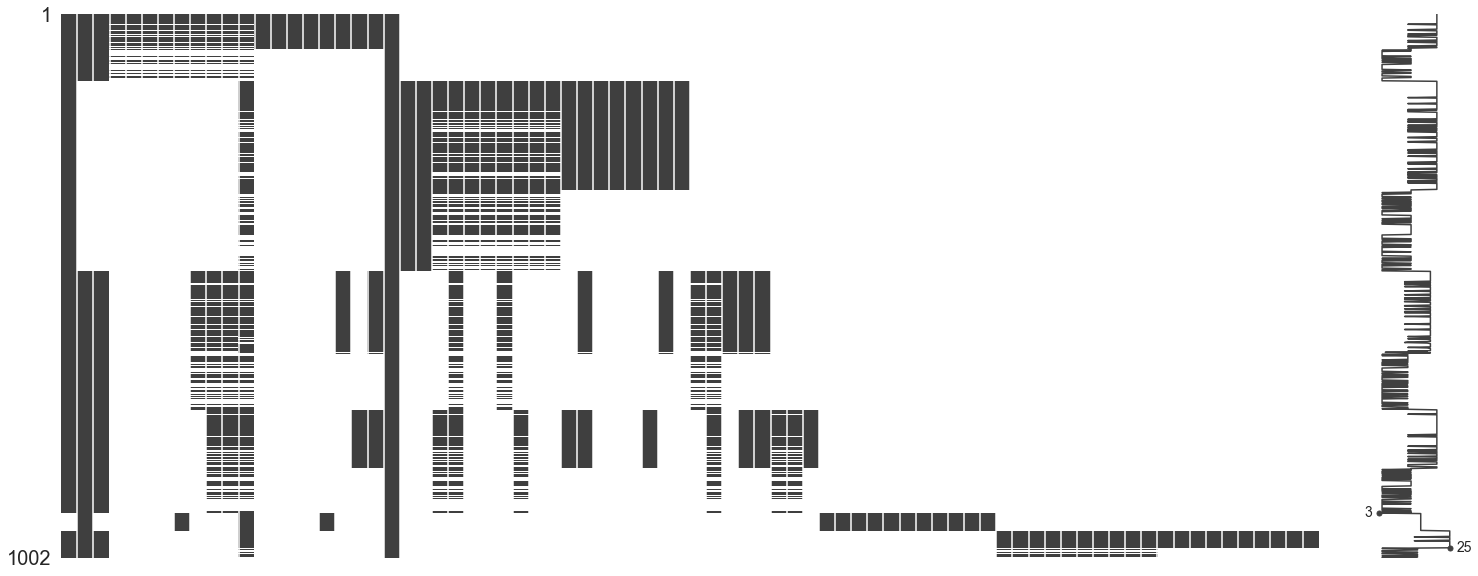

In [22]:
import missingno as msno # we are using missingno to visualize the distribution of NaN(Not a Number) values

msno.matrix(full_df) # print a missing numbers matrix to show where missing numbers are

In [23]:
full_df.fillna(0)

,Playername,Teamname,Playerposition,2019completedpass,2019attemptedpass,2019passingyds,2019passingtd,2019int,2019car,2019rushyds,...,2020completed1-39,2020attempted1-39,2020completed40-49,2020attempted40-49,2020completed50+,2020attempted50+,2020completedtot,2020attemptedtot,2020completedxp,2020attemptedxp
0,Lamar Jackson,Ravens,QB,265.0,401.0,3127.0,36.0,6.0,176.0,1206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Patrick Mahomes,Chiefs,QB,319.0,484.0,4031.0,26.0,5.0,43.0,218.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Deshaun Watson,Texans,QB,333.0,495.0,3852.0,26.0,12.0,82.0,413.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Dak Prescott,Cowboys,QB,388.0,596.0,4902.0,30.0,11.0,52.0,277.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Russell Wilson,Seahawks,QB,341.0,516.0,4110.0,31.0,5.0,75.0,342.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Mike Nugent,FA,K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,Graham Gano,Panthers,K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Ryan Succop,Titans,K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,Stephen Gostkowski,FA,K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Create an empty list
Row_list =[]
  
# Iterate over each row
for index, rows in full_df.iterrows():
    # Create list for the current row
    my_list =[rows.Playername]
      
    # append the list to the final list
    Row_list.append(my_list)
  
print(Row_list)

[['Lamar Jackson'], ['Patrick Mahomes'], ['Deshaun Watson'], ['Dak Prescott'], ['Russell Wilson'], ['Kyler Murray'], ['Tom Brady'], ['Matt Ryan'], ['Matthew Stafford'], ['Carson Wentz'], ['Drew Brees'], ['Josh Allen'], ['Aaron Rodgers'], ['Daniel Jones'], ['Jared Goff'], ['Ben Roethlisberger'], ['Ryan Tannehill'], ['Baker Mayfield'], ['Jimmy Garoppolo'], ['Joe Burrow'], ['Kirk Cousins'], ['Philip Rivers'], ['Gardner Minshew II'], ['Drew Lock'], ['Sam Darnold'], ['Cam Newton'], ['Dwayne Haskins Jr.'], ['Derek Carr'], ['Teddy Bridgewater'], ['Tua Tagovailoa'], ['Justin Herbert'], ['Nick Foles'], ['Mitchell Trubisky'], ['Tyrod Taylor'], ['Ryan Fitzpatrick'], ['Jarrett Stidham'], ['Marcus Mariota'], ['P.J. Walker'], ['Mason Rudolph'], ['Kyle Allen'], ['Jalen Hurts'], ['Joshua Dobbs'], ['Blaine Gabbert'], ['Jameis Winston'], ['Matt Barkley'], ['Robert Griffin III'], ['Matt Schaub'], ['Colt McCoy'], ['Brett Hundley'], ['Geno Smith'], ['Chase Daniel'], ['Case Keenum'], ['Chad Henne'], ['Andy 

In [25]:
### How to remove nan values from playername and '--'???


### Export the dataframe to a csv

In [26]:
full_df.to_csv('../../fixtures/cleaned_data/cleaned_kaggle_dataset')

In [27]:
kaggle_df = pd.read_csv('../../fixtures/cleaned_data/cleaned_kaggle_dataset')

In [28]:
names_2019_2020 = kaggle_df[['Playername', 'Playerposition','2019fpts', '2020fpts']]
names_2019_2020

,Playername,Playerposition,2019fpts,2020fpts
0,Lamar Jackson,QB,415.68,338.23
1,Patrick Mahomes,QB,287.04,332.66
2,Deshaun Watson,QB,320.98,314.06
3,Dak Prescott,QB,337.78,301.71
4,Russell Wilson,QB,328.60,293.96
...,...,...,...,...
997,Mike Nugent,K,27.00,0.00
998,Graham Gano,K,NaN,0.00
999,Ryan Succop,K,22.00,0.00
1000,Stephen Gostkowski,K,32.00,0.00


In [29]:
names_2019_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Playername      970 non-null    object 
 1   Playerposition  620 non-null    object 
 2   2019fpts        681 non-null    float64
 3   2020fpts        1001 non-null   float64
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


### Plot 2020 vs 2019 points

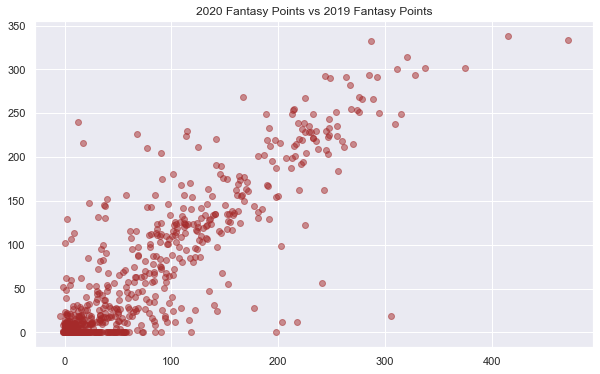

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(names_2019_2020['2019fpts'], names_2019_2020['2020fpts'], alpha = 0.5, color="brown")
plt.title('2020 Fantasy Points vs 2019 Fantasy Points')
plt.show()

Text(0, 0.5, '2019fpts')

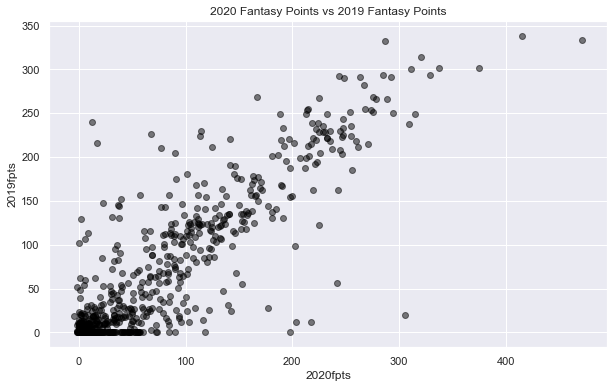

In [31]:
plt.scatter(names_2019_2020["2019fpts"], names_2019_2020["2020fpts"], alpha = 0.5, color="black")
plt.title("2020 Fantasy Points vs 2019 Fantasy Points")
plt.xlabel("2020fpts")
plt.ylabel("2019fpts")

### Number of Players per Position

In [32]:
players_per_pos = kaggle_df.groupby('Playerposition').size()
players_per_pos

Playerposition
--          1
DT, RB      1
K          50
QB        124
RB        254
TE        190
dtype: int64

In [33]:
kaggle_df.loc[kaggle_df['Playerposition'] == 'K']

,Unnamed: 0,Playername,Teamname,Playerposition,2019completedpass,2019attemptedpass,2019passingyds,2019passingtd,2019int,2019car,...,2020completed1-39,2020attempted1-39,2020completed40-49,2020attempted40-49,2020completed50+,2020attempted50+,2020completedtot,2020attemptedtot,2020completedxp,2020attemptedxp
952,0,Harrison Butker,Chiefs,K,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,8.0,10.0,3.0,5.0,26.0,31.0,49.0,51.0
953,1,Wil Lutz,Saints,K,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,8.0,10.0,3.0,5.0,27.0,31.0,46.0,48.0
954,2,Justin Tucker,Ravens,K,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,8.0,10.0,3.0,5.0,27.0,30.0,43.0,44.0
955,3,Matt Prater,Lions,K,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,17.0,8.0,10.0,3.0,5.0,27.0,32.0,38.0,40.0
956,4,Robbie Gould,49ers,K,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,17.0,8.0,10.0,3.0,5.0,26.0,32.0,39.0,42.0
957,5,Chris Boswell,Steelers,K,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,7.0,10.0,3.0,5.0,26.0,31.0,38.0,40.0
958,6,Younghoe Koo,Falcons,K,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,17.0,8.0,10.0,3.0,5.0,27.0,32.0,35.0,38.0
959,7,Austin Seibert,Browns,K,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,16.0,7.0,10.0,3.0,5.0,26.0,31.0,38.0,41.0
960,8,Matt Gay,Buccaneers,K,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,16.0,7.0,10.0,3.0,5.0,25.0,31.0,41.0,44.0
961,9,Chase McLaughlin,Colts,K,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,17.0,8.0,10.0,3.0,5.0,26.0,32.0,37.0,41.0


In [34]:
players_per_pos.values

array([  1,   1,  50, 124, 254, 190])

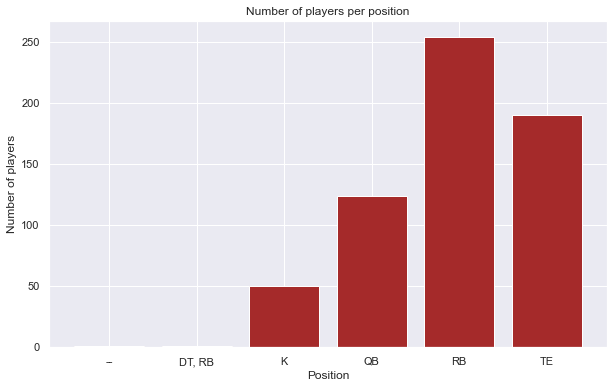

In [35]:
plt.figure(figsize=(10,6))
plt.bar(players_per_pos.index,players_per_pos.values, color="brown")
plt.title('Number of players per position')
plt.xlabel('Position')
plt.ylabel('Number of players')

plt.show()

### Which position scores the most, on average?

In [36]:
avg_points_per_pos = kaggle_df.groupby('Playerposition')['2019fpts'].mean()
avg_points_per_pos

Playerposition
--               NaN
DT, RB     18.700000
K          93.377500
QB        118.921389
RB         72.712308
TE         47.941667
Name: 2019fpts, dtype: float64

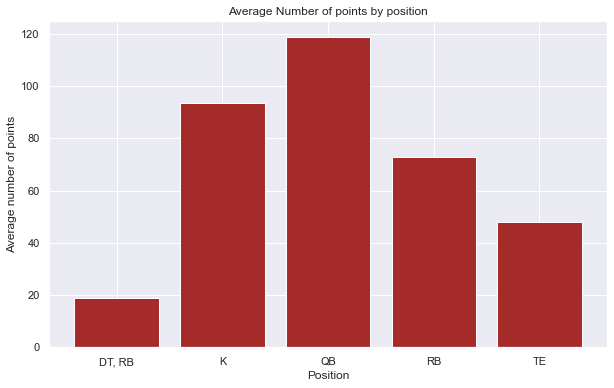

In [37]:
plt.figure(figsize=(10,6))
plt.bar(avg_points_per_pos.index,avg_points_per_pos.values, color="brown")
plt.title('Average Number of points by position')
plt.xlabel('Position')
plt.ylabel('Average number of points')
plt.show()

<AxesSubplot:xlabel='Playerposition', ylabel='2020fpts'>

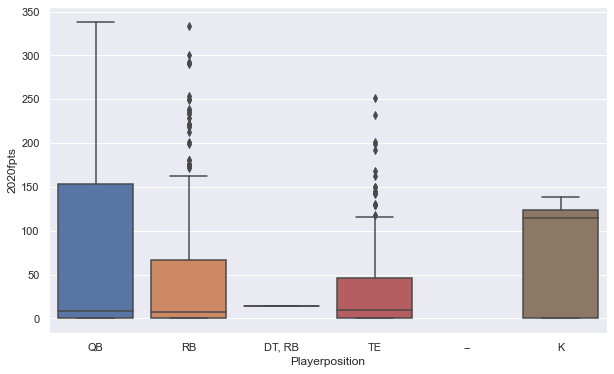

In [38]:
#boxplot to visualize how different positions scored in 2020"

sns.boxplot(x="Playerposition", y="2020fpts",data=names_2019_2020)

<AxesSubplot:xlabel='Playerposition', ylabel='2019fpts'>

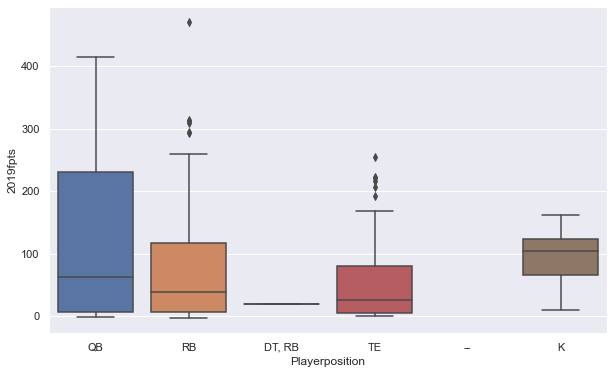

In [39]:
#boxplot to visualize how different positions scored in 2019"

sns.boxplot(x="Playerposition", y="2019fpts",data=names_2019_2020)

### How many players are expected to score more than 15 fpts per game in 2020?

Each team plays 16 games.

In [40]:
#15 points per game = 16 * 15 = 240

players_scoring_more_than_15_2020 = names_2019_2020.loc[names_2019_2020['2020fpts'] > 
                                    (15*16)].sort_values('2020fpts').groupby('Playerposition').count()
players_scoring_more_than_15_2020

,Playername,2019fpts,2020fpts
Playerposition,,,
QB,15,15,15
RB,8,8,8
TE,1,1,1


### What does the distribution of projected points look like?

In [41]:
sorted_by_proj = names_2019_2020.sort_values('2020fpts', ascending = False)
sorted_by_proj

,Playername,Playerposition,2019fpts,2020fpts
0,Lamar Jackson,QB,415.68,338.23
474,Christian McCaffrey,RB,471.20,333.95
1,Patrick Mahomes,QB,287.04,332.66
2,Deshaun Watson,QB,320.98,314.06
3,Dak Prescott,QB,337.78,301.71
...,...,...,...,...
461,Marken Michel,NaN,NaN,0.00
462,Sammie Coates Jr.,NaN,NaN,0.00
463,Antonio Callaway,NaN,16.90,0.00
1001,Tyler Bass,K,NaN,0.00


In [42]:
# drop all players who are expected zero points in 2020

sorted_by_proj = sorted_by_proj[sorted_by_proj['2020fpts'] != 0]
sorted_by_proj

,Playername,Playerposition,2019fpts,2020fpts
0,Lamar Jackson,QB,415.68,338.23
474,Christian McCaffrey,RB,471.20,333.95
1,Patrick Mahomes,QB,287.04,332.66
2,Deshaun Watson,QB,320.98,314.06
3,Dak Prescott,QB,337.78,301.71
...,...,...,...,...
323,DeAndrew White,NaN,9.10,0.12
625,Malcolm Perry,RB,NaN,0.12
322,Trent Sherfield,NaN,12.00,0.12
624,Trenton Cannon,RB,0.00,0.12


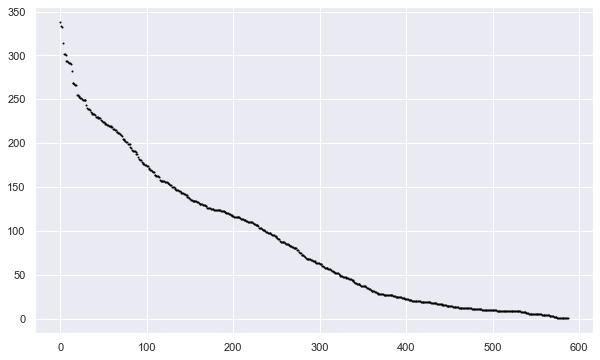

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(list(range(len(sorted_by_proj))), sorted_by_proj['2020fpts'], s =1, color="black")
plt.show()